# 4.9 Intro to Data Visualization Part 2

## This script contains the following points:

#### 1. Import libraries and data
#### 2. Follow instructions in the Exercise
#### 3. Create a histogram of the 'order_hour_of_day' column
#### 4. Create a bar chart from the 'loyalty_flag' columns
#### 5. Check whether there's a difference in expenditure depending on hour of the day
#### 6. Determine whether there's a connectiong between age and family situations by creating a line chart
#### 7. Explore whether there's a connection between age and income. Use a scatter plot.

# 1a. Import libraries 

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1b. Import data

In [2]:
path = r'H:\CF\Immersion into Data Analystics\4 Python Fundamentals for Data Analysts\Instacart Basket Analysis'

In [3]:
path

'H:\\CF\\Immersion into Data Analystics\\4 Python Fundamentals for Data Analysts\\Instacart Basket Analysis'

In [33]:
df_icart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_data_merged2.pkl'))

In [37]:
# checking output
df_icart.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,max_order,loyalty_flag,mean_price,spender_flag,customer_frequency,frequency_flag,Age,n_dependants,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,31,3,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,31,3,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,31,3,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,31,3,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,31,3,40423,both


In [38]:
# dropping "_merge" column

df_icart = df_icart.drop(columns = ['_merge'])

In [39]:
# checking output
df_icart.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender_flag,customer_frequency,frequency_flag,Age,n_dependants,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,31,3,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,31,3,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,31,3,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,31,3,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Average orders,10,New customer,6.367797,Low spender,20.5,Non-Frequent Customer,31,3,40423


In [40]:
df_icart['prices'].max()

25.0

# 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

### Task completed during exercise, will attach notebook for exercise.


# 3. Create a histogram of the 'order_hour_of_day' column.

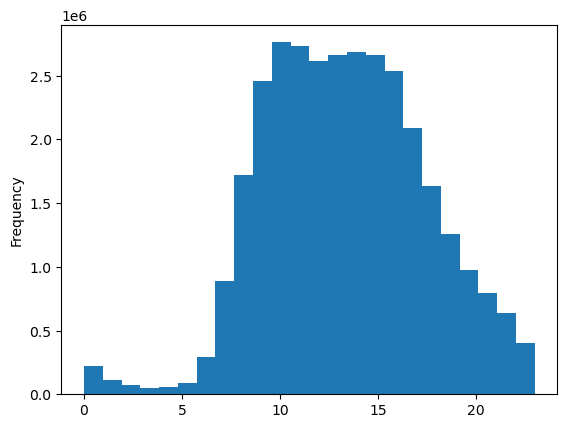

In [41]:
# creating histogram
hist = df_icart['order_hour_of_day'].plot.hist(bins = 24)

In [42]:
# exporting histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hod.png'))

####  Orders begin to increase after 5am, hitting the highest peak somewhere between 8-10am. Afterwards, orders start to decline again, but only slightly. This if followed by a slight increase in activity slightly before 3pm (I'd probably still consider this to be unimodal, but arguably can be bimodal). After around 3pm order activety steadly declines and continues to do so until 5am the following cycle.  


# 4. Create a bar chart from the 'loyalty_flag' column

<AxesSubplot:>

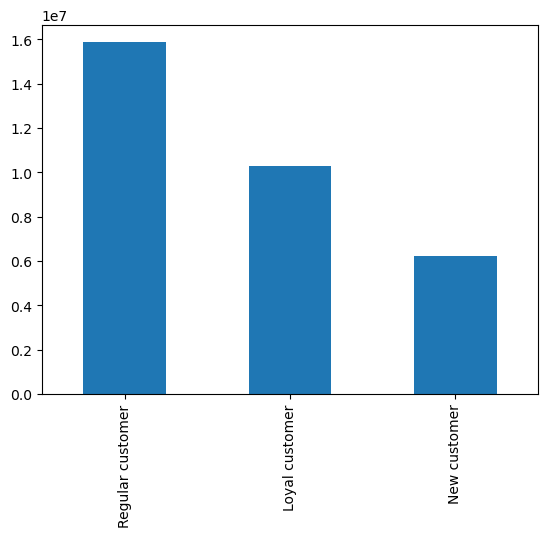

In [43]:
# Create a bar chart
df_icart['loyalty_flag'].value_counts().plot.bar()

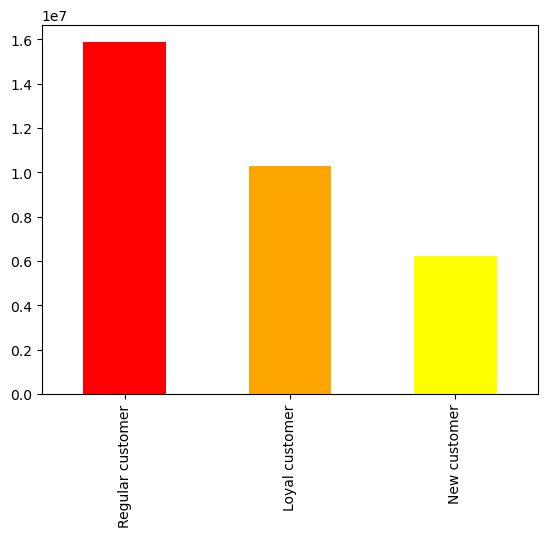

In [44]:
bar = df_icart['loyalty_flag'].value_counts().plot.bar(color =['red', 'orange','yellow'])

In [45]:
# exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

# 5. Check whether there's a difference in expenditure (the 'prices' column) depending on hour of the day. Use an accurate sample for your line chart.

In [46]:
# sampling data, 70/30 split
np.random.seed(20)
dev = np.random.rand(len(df_icart)) <= 0.7

In [47]:
# store 70% of the sample in dataframe big
big = df_icart[dev]

In [48]:
# store 30% of the sample in dataframe small
small = df_icart[~dev]

In [49]:
# checking results 

len(df_icart)

32404859

In [50]:
len(big)

22686729

In [51]:
len(small)

9718130

In [52]:
len(big) + len(small)

32404859

In [53]:
# creating subset of only necessary columns
df_icart2 = small[['order_hour_of_day', 'prices']]

In [54]:
# checking output
df_icart2.shape

(9718130, 2)

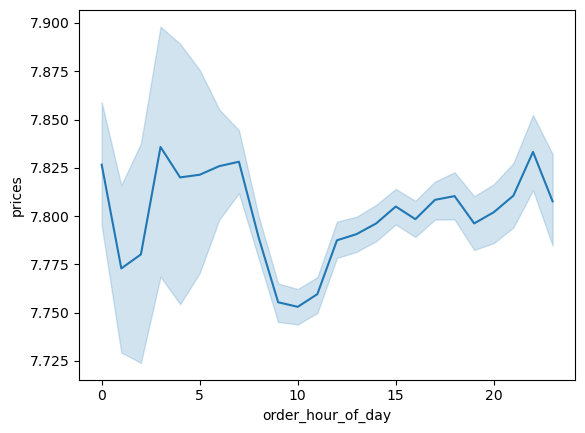

In [55]:
# create line chart
line = sns.lineplot(data = df_icart2, x = 'order_hour_of_day',y = 'prices')

#### It appears that customers are more likely to buy more expensive products at odd hours of the morning (insomnia induced impulse buys?), then lower prices during 'regular' morning hours, then price of products bought begins to increase again after 10 am, but then fall around 8 pm.

In [57]:
# export chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_hod.png'))

# 6. Determine whether there's a connection between age and family situations by creating a line chart exploring the connections between age and number of dependents

In [61]:
# creating subset of only necessary columns
df_icart3 = small[['Age', 'n_dependants']]

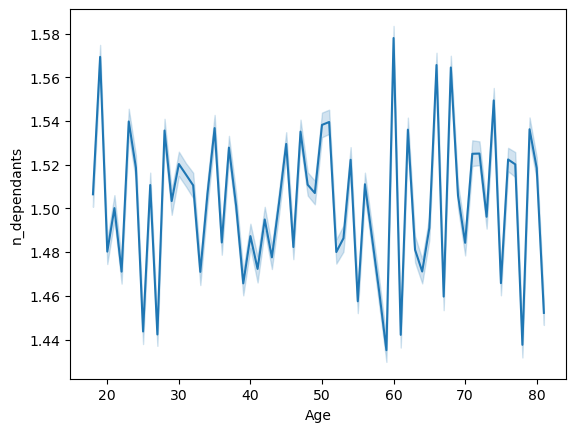

In [62]:
# create line chart
line2 = sns.lineplot(data = df_icart3, x = 'Age',y = 'n_dependants')

### There is no clear correlation between instacart customer age and number of dependants.

In [63]:
# exporting chart
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))

# 7. Explore whether there's a connection between age and income. Use a scatterplot.

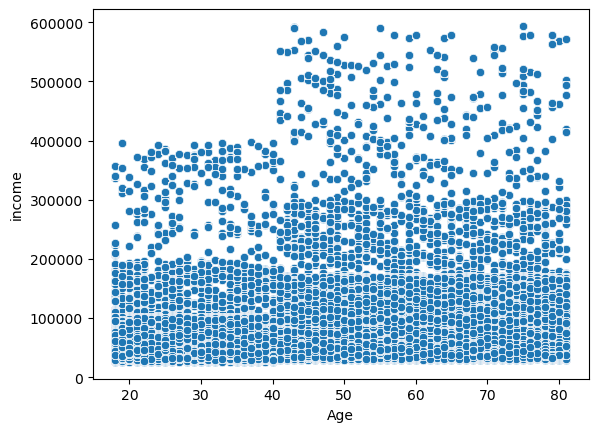

In [73]:
# creating scatter plot
scatter = sns.scatterplot(x = 'Age', y = 'income', data = df_icart)

### There seems to be a sharp increase in income after the age of 40 for a fraction of the population, but it appears the majority of people, of all ages, are generally beneath the 200000 mark.

In [74]:
#checking data due to odd increase
df_age = df_icart.groupby('Age').agg({'income': ['mean', 'min', 'max']})

In [75]:
df_age.head(35)

income               
              mean    min     max
Age                              
18    70471.861282  26067  357226
19    69774.691204  25972  396364
20    70785.248085  26024  338939
21    70566.302749  25937  372571
22    69864.954946  26070  369192
23    70748.116602  26146  381379
24    71882.992421  26072  391834
25    71059.249812  26137  385324
26    70542.582497  26045  371450
27    70627.941713  25979  378234
28    69515.640420  26580  376208
29    70279.575149  26013  392552
30    69554.082017  25991  381351
31    70187.630460  26039  391967
32    70173.656072  25955  367501
33    70660.187436  26061  395178
34    70781.852796  25911  387860
35    71363.218600  25999  388874
36    71018.971216  26170  351375
37    70307.516761  25986  397929
38    69864.608772  26234  390410
39    70770.714355  25903  382018
40    70926.764325  26154  395360
41   116569.827284  29017  551849
42   116613.969549  29081  549286
43   116931.871967  29463  592409
44   114939.490492  29076  567729
45   117610.156500  29082  569810
46   115578.581016  29053  550917
47   115323.771745  29044  584097
48   117431.462528  29663  536156
49   116875.254108  29112  559700
50   116085.350181  29085  574425
51   114970.496284  29085  528184
52   114308.066302  29257  526894

### Between the age of 40 and 41 there is approximately a 1.5x increase in income. This seems unusual, suggest checking data source.

In [76]:
# exporting chart
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dot_age_income.png'))